<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <table>
                    <tr>
                        <td>
                            <img src="2018-09-17-figure1.png" style="max-width: 60px; display: block;">
                        </td>
                        <td>
                            <font color=#3FC3F5 size="5px">
                                <b>News Classifier Using NLP
</b>
                            </font>
                        </td>
                    </tr>
                </table>
            </div>
            <p style="text-align:center; margin-top: 10px;">
                <span style="color: #3FC3F5;">Copyright (©)  Vengatesan-K. All Rights Reserved.</span>
            </p>
        </td>
    </tr>
</table>

<span style="color: #3FC3F5; font-weight: bold; font-family:Times New Roman; font-size: 22px; text-decoration: underline;">Context :</span>

> **Building a News classification system involves several steps, including web scraping, data preprocessing, and model training.**

<span style="color: #3FC3F5; font-weight: bold; font-family:Times New Roman; font-size: 18px; text-decoration: underline;">Steps Involved :</span>

> - **Data Cleaning and Preprocessing**
>
> - **Text Representation**
>
> - **Topic Clustering**
>
> - **Topic Labeling**
>
> - **Classification Model**
>
> - **Evaluation**

<table align="right">
    <tr>
        <td width="100%">
            <img src="2018-09-17-figure1.png">
        </td>
        <td>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="4%">
            <img src="https://icons.veryicon.com/png/o/system/hywf-background-icon/import-37.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import Libraries</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import random
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from collections import Counter
import pickle

In [83]:
news_df = pd.read_csv('Final_News_Scrapped.csv')
news_df

Title   \
0    Eight dead in Japan earthquake as search for s...   
1    Watch: How earthquake shook Japan on New Year'...   
2     Australian jailed in Iraq reaches grim milestone   
3      Nobel laureate Muhammad Yunus sentenced to jail   
4    Israel Supreme Court strikes down judicial ref...   
..                                                 ...   
498  Taiwan's President Tsai urges China to seek 'p...   
499  UN peacekeeping mission wraps up Mali deployme...   
500   Guinea junta announces constitutional referendum   
501  U.S. Supreme Court Chief Justice urges ‘cautio...   
502  Japan lowers tsunami warning after a series of...   

                                               Content  
0    Thousands of people have spent the night in ev...  
1    Dozens of buildings collapse in several towns,...  
2    Robert Pether has been detained for 1,000 days...  
3    Supporters of the Bangladeshi economist say th...  
4    The controversial plans triggered nationwide p...  
..                                                 ...  
498  Taiwan is less than two weeks from an election...  
499  The UN stabilisation mission MINUSMA, had been...  
500  The junta also said that people appointed by t...  
501  The Chief Justice’s commentary is his most sig...  
502  The quakes, the largest of which had a magnitu...  

[503 rows x 2 columns]

<table align="left">
    <tr>
        <td width="4%">
            <img src="NewsDB.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>About Dataset</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

| Attributes        | Description                                           | Shape |
| ------------- | ----------------------------------------------------- | ------------- |
| Title         | News Headings                | 503 |
| Content      | Breif of News                           | 503 |

In [84]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      503 non-null    object
 1     Content  503 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [85]:
news_df.shape

(503, 2)

In [86]:
news_df = news_df .rename(columns={'  Content': 'Content'})
news_df.columns

Index(['Title ', 'Content'], dtype='object')

### Remove HTML tags, advertisements, and non-text content:

In [87]:
# Function to remove HTML tags and non-alphabetic characters
def remove_html_nonalpha(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

# Function to convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

### Tokenization and stop words removal:

In [88]:
nltk.download('punkt')
nltk.download('stopwords')

# Function for tokenization and removing stop words
def tokenize_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VENKA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VENKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lemmatization (using WordNet Lemmatizer from NLTK):

In [89]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

# Function for lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VENKA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
# Function to reassemble tokens into cleaned text
def reassemble_text(tokens):
    cleaned_text = ' '.join(tokens)
    cleaned_text = re.sub(' +', ' ', cleaned_text)  # Remove extra spaces
    return cleaned_text

# Function to apply the cleaning steps to text
def clean_text(text):
    text = remove_html_nonalpha(text)
    text = convert_to_lowercase(text)
    tokens = tokenize_remove_stopwords(text)
    tokens = lemmatize_text(tokens)
    cleaned_text = reassemble_text(tokens)
    return cleaned_text

In [91]:
news_df['Content'] = news_df['Content'].apply(remove_html_nonalpha)
news_df['Content'] = news_df['Content'].apply(convert_to_lowercase)
news_df['Content'] = news_df['Content'].apply(tokenize_remove_stopwords)
news_df['Content'] = news_df['Content'].apply(lemmatize_text)
news_df['Content'] = news_df['Content'].apply(reassemble_text)
news_df['Content'] = news_df['Content'].apply(clean_text)

news_df.dropna(inplace=True)

news_df.to_csv('cleaned_final_content.csv', index=False)

In [2]:
final_con = pd.read_csv('cleaned_final_content.csv')
final_con

Title   \
0    Eight dead in Japan earthquake as search for s...   
1    Watch: How earthquake shook Japan on New Year'...   
2     Australian jailed in Iraq reaches grim milestone   
3      Nobel laureate Muhammad Yunus sentenced to jail   
4    Israel Supreme Court strikes down judicial ref...   
..                                                 ...   
498  Taiwan's President Tsai urges China to seek 'p...   
499  UN peacekeeping mission wraps up Mali deployme...   
500   Guinea junta announces constitutional referendum   
501  U.S. Supreme Court Chief Justice urges ‘cautio...   
502  Japan lowers tsunami warning after a series of...   

                                               Content  
0    thousand people spent night evacuation centre ...  
1    dozen building collapse several town trapping ...  
2    robert pether detained day family call hostage...  
3    supporter bangladeshi economist say case polit...  
4    controversial plan triggered nationwide protes...  
..                                                 ...  
498  taiwan le two week election closely watched be...  
499       un stabilisation mission minusma place since  
500  junta also said people appointed state soon na...  
501  chief justice commentary significant discussio...  
502  quake largest magnitude started fire collapsed...  

[503 rows x 2 columns]

### Combine Text and Word Embeddings Using GloVe

In [11]:
# Combine 'Title' and 'Content' into a single column 'Combined_Text'
final_con['Combined_Text'] = final_con['Title'] + ' ' + final_con['Content']

# Fill missing values (NaN) with an empty string or any other appropriate value
final_con['Combined_Text'].fillna('', inplace=True)  # Fill NaN with an empty string

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Function to generate document embeddings using pre-trained GloVe embeddings
def generate_document_embeddings(text_data, embeddings):
    document_embeddings = []
    for doc in text_data:
        words_in_doc = doc.split()
        doc_embedding = np.mean([embeddings[word] for word in words_in_doc if word in embeddings], axis=0)
        if np.any(np.isnan(doc_embedding)):  # Handle NaN values in embeddings
            doc_embedding = np.zeros_like(next(iter(embeddings.values())))
        document_embeddings.append(doc_embedding)
    
    return np.array(document_embeddings)

glove_file_path = 'glove.6B.100d.txt'  # Replace with the actual file path
glove_embeddings = load_glove_embeddings(glove_file_path)

# Generate document embeddings
document_embeddings = generate_document_embeddings(final_con['Combined_Text'], glove_embeddings)

c:\Users\VENKA\Desktop\Data Science\Project\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\VENKA\Desktop\Data Science\Project\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
document_embeddings

array([[-0.11884966,  0.46820658,  0.27805352, ...,  0.0738484 ,
         0.47180396, -0.08658315],
       [-0.04802033,  0.26092666,  0.13092108, ...,  0.02505501,
         0.57922834, -0.06900749],
       [-0.02638417, -0.06220751,  0.29466835, ..., -0.08343849,
         0.14302292, -0.01166583],
       ...,
       [-0.14251123, -0.18533315,  0.3203198 , ..., -0.24699166,
         0.22846131, -0.06974465],
       [-0.08840943, -0.07008935,  0.27863517, ..., -0.3859631 ,
         0.26269493,  0.3476335 ],
       [-0.11993778,  0.22289853,  0.3701335 , ..., -0.02804717,
         0.58803463, -0.07785154]], dtype=float32)

### K-Means clustering

In [13]:
# Perform K-Means clustering on the document embeddings
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_embeddings)

# Get cluster labels for each document
cluster_labels = kmeans.labels_

final_con['Cluster_Labels'] = cluster_labels

# Print cluster labels for each document (just as an example)
for idx, label in enumerate(cluster_labels):
    print(f"Document {idx}: Cluster {label}")


c:\Users\VENKA\Desktop\Data Science\Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Document 0: Cluster 0
Document 1: Cluster 0
Document 2: Cluster 0
Document 3: Cluster 2
Document 4: Cluster 2
Document 5: Cluster 4
Document 6: Cluster 0
Document 7: Cluster 2
Document 8: Cluster 4
Document 9: Cluster 2
Document 10: Cluster 2
Document 11: Cluster 4
Document 12: Cluster 0
Document 13: Cluster 2
Document 14: Cluster 4
Document 15: Cluster 4
Document 16: Cluster 0
Document 17: Cluster 2
Document 18: Cluster 1
Document 19: Cluster 2
Document 20: Cluster 4
Document 21: Cluster 2
Document 22: Cluster 2
Document 23: Cluster 0
Document 24: Cluster 4
Document 25: Cluster 2
Document 26: Cluster 4
Document 27: Cluster 3
Document 28: Cluster 3
Document 29: Cluster 0
Document 30: Cluster 4
Document 31: Cluster 4
Document 32: Cluster 2
Document 33: Cluster 2
Document 34: Cluster 4
Document 35: Cluster 4
Document 36: Cluster 0
Document 37: Cluster 4
Document 38: Cluster 4
Document 39: Cluster 4
Document 40: Cluster 4
Document 41: Cluster 0
Document 42: Cluster 0
Document 43: Cluster 

In [15]:
#final_con= final_con.rename(columns={'Title ': 'Title'})
final_con

Title  \
0    Eight dead in Japan earthquake as search for s...   
1    Watch: How earthquake shook Japan on New Year'...   
2     Australian jailed in Iraq reaches grim milestone   
3      Nobel laureate Muhammad Yunus sentenced to jail   
4    Israel Supreme Court strikes down judicial ref...   
..                                                 ...   
498  Taiwan's President Tsai urges China to seek 'p...   
499  UN peacekeeping mission wraps up Mali deployme...   
500   Guinea junta announces constitutional referendum   
501  U.S. Supreme Court Chief Justice urges ‘cautio...   
502  Japan lowers tsunami warning after a series of...   

                                               Content  \
0    thousand people spent night evacuation centre ...   
1    dozen building collapse several town trapping ...   
2    robert pether detained day family call hostage...   
3    supporter bangladeshi economist say case polit...   
4    controversial plan triggered nationwide protes...   
..                                                 ...   
498  taiwan le two week election closely watched be...   
499       un stabilisation mission minusma place since   
500  junta also said people appointed state soon na...   
501  chief justice commentary significant discussio...   
502  quake largest magnitude started fire collapsed...   

                                         Combined_Text  Cluster_Labels  
0    Eight dead in Japan earthquake as search for s...               0  
1    Watch: How earthquake shook Japan on New Year'...               0  
2    Australian jailed in Iraq reaches grim milesto...               0  
3    Nobel laureate Muhammad Yunus sentenced to jai...               2  
4    Israel Supreme Court strikes down judicial ref...               2  
..                                                 ...             ...  
498  Taiwan's President Tsai urges China to seek 'p...               2  
499  UN peacekeeping mission wraps up Mali deployme...               0  
500  Guinea junta announces constitutional referend...               2  
501  U.S. Supreme Court Chief Justice urges ‘cautio...               2  
502  Japan lowers tsunami warning after a series of...               0  

[503 rows x 4 columns]

### Cosine Similarity

In [16]:
# Calculate cosine similarity matrix between document embeddings
similarity_matrix = cosine_similarity(document_embeddings)

In [17]:
similarity_matrix

array([[0.9999999 , 0.92174906, 0.82366127, ..., 0.72293925, 0.69970024,
        0.967364  ],
       [0.92174906, 1.0000002 , 0.7952163 , ..., 0.732596  , 0.7034017 ,
        0.93341476],
       [0.82366127, 0.7952163 , 0.9999999 , ..., 0.80127746, 0.7957948 ,
        0.8433535 ],
       ...,
       [0.72293925, 0.732596  , 0.80127746, ..., 1.        , 0.85039264,
        0.78576916],
       [0.69970024, 0.7034017 , 0.7957948 , ..., 0.85039264, 0.9999999 ,
        0.7572133 ],
       [0.967364  , 0.93341476, 0.8433535 , ..., 0.78576916, 0.7572133 ,
        1.        ]], dtype=float32)

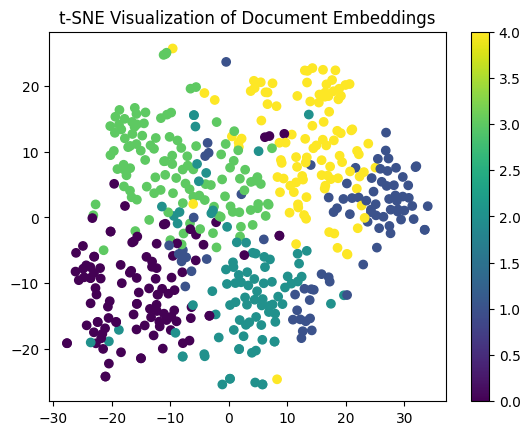

In [18]:
# Perform dimensionality reduction with t-SNE
tsne = TSNE(n_components=2, random_state=42)
document_embeddings_2d = tsne.fit_transform(document_embeddings)

# Visualize document embeddings in 2D
plt.scatter(document_embeddings_2d[:, 0], document_embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of Document Embeddings')
plt.colorbar()
plt.show()


In [21]:
# Combine 'Title' and 'Content' into a single column 'Combined_Text'
final_con['Combined'] = final_con['Title'] + ' ' + final_con['Content']
final_con['Combined'].fillna('', inplace=True)

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
doc_term_matrix = vectorizer.fit_transform(final_con['Combined'])

# Perform Latent Dirichlet Allocation (LDA) on the document-term matrix
num_topics = 5  # Define the number of topics
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_distribution = lda.fit_transform(doc_term_matrix)

In [22]:
topic_distribution

array([[0.95936209, 0.01016737, 0.01024678, 0.01013875, 0.01008502],
       [0.42838136, 0.5281119 , 0.0144552 , 0.01445675, 0.0145948 ],
       [0.02526652, 0.02540446, 0.02529345, 0.02528343, 0.89875213],
       ...,
       [0.925804  , 0.0183118 , 0.01850679, 0.01886556, 0.01851185],
       [0.01270445, 0.94875099, 0.01273322, 0.01295987, 0.01285147],
       [0.00668375, 0.97377517, 0.00651391, 0.0065231 , 0.00650408]])

In [23]:
final_con

Title  \
0    Eight dead in Japan earthquake as search for s...   
1    Watch: How earthquake shook Japan on New Year'...   
2     Australian jailed in Iraq reaches grim milestone   
3      Nobel laureate Muhammad Yunus sentenced to jail   
4    Israel Supreme Court strikes down judicial ref...   
..                                                 ...   
498  Taiwan's President Tsai urges China to seek 'p...   
499  UN peacekeeping mission wraps up Mali deployme...   
500   Guinea junta announces constitutional referendum   
501  U.S. Supreme Court Chief Justice urges ‘cautio...   
502  Japan lowers tsunami warning after a series of...   

                                               Content  \
0    thousand people spent night evacuation centre ...   
1    dozen building collapse several town trapping ...   
2    robert pether detained day family call hostage...   
3    supporter bangladeshi economist say case polit...   
4    controversial plan triggered nationwide protes...   
..                                                 ...   
498  taiwan le two week election closely watched be...   
499       un stabilisation mission minusma place since   
500  junta also said people appointed state soon na...   
501  chief justice commentary significant discussio...   
502  quake largest magnitude started fire collapsed...   

                                         Combined_Text  Cluster_Labels  \
0    Eight dead in Japan earthquake as search for s...               0   
1    Watch: How earthquake shook Japan on New Year'...               0   
2    Australian jailed in Iraq reaches grim milesto...               0   
3    Nobel laureate Muhammad Yunus sentenced to jai...               2   
4    Israel Supreme Court strikes down judicial ref...               2   
..                                                 ...             ...   
498  Taiwan's President Tsai urges China to seek 'p...               2   
499  UN peacekeeping mission wraps up Mali deployme...               0   
500  Guinea junta announces constitutional referend...               2   
501  U.S. Supreme Court Chief Justice urges ‘cautio...               2   
502  Japan lowers tsunami warning after a series of...               0   

                                              Combined  
0    Eight dead in Japan earthquake as search for s...  
1    Watch: How earthquake shook Japan on New Year'...  
2    Australian jailed in Iraq reaches grim milesto...  
3    Nobel laureate Muhammad Yunus sentenced to jai...  
4    Israel Supreme Court strikes down judicial ref...  
..                                                 ...  
498  Taiwan's President Tsai urges China to seek 'p...  
499  UN peacekeeping mission wraps up Mali deployme...  
500  Guinea junta announces constitutional referend...  
501  U.S. Supreme Court Chief Justice urges ‘cautio...  
502  Japan lowers tsunami warning after a series of...  

[503 rows x 5 columns]

### Logistic Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, final_con['Cluster_Labels'], test_size=0.2, random_state=42)

# Train a classifier (e.g., Logistic Regression) using document embeddings
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict sentiment labels on the test set
predictions = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9405940594059405

### Clustering Articles By Similiarity

In [34]:
sample_size_per_cluster = 5  

# Iterate through each cluster and sample articles
for cluster_id in range(num_clusters):  # 'num_clusters' is the total number of clusters
    cluster_documents = final_con[final_con['Cluster_Labels'] == cluster_id]['Combined_Text']
    
    # Sample a subset of documents from the current cluster
    sampled_documents = cluster_documents.sample(min(len(cluster_documents), sample_size_per_cluster))
    
    print(f"\nCluster {cluster_id} - Sampled Articles:")
    for idx, document_text in enumerate(sampled_documents):
        # Print the index and preprocessed text of each sampled document in the cluster
        print(f"Article {idx + 1}: {document_text}")


Cluster 0 - Sampled Articles:
Article 1: Police arrest one more person for murder of 17-year-old boy from M.G.R. Nagar duo abducted victim took place near nesapakkam sewage station killed
Article 2: Israel-Palestine conflict | More strikes on Gaza after Israel warns war will last through 2024 nearly three month conflict claimed almost life gaza according hamas run health ministry devastated much besieged territory
Article 3: Sierra Leone leader pardons 352 inmates after failed coup move came wake alleged coup attempt november armed attacker stormed military armoury two barrack two prison two police station
Article 4: UN peacekeeping mission wraps up Mali deployment after being ordered out un stabilisation mission minusma place since
Article 5: Spotlight On 'Donkey Flights' As Illegal Migration Rises In Punjab, Haryana: Report recent case alleged donkey flight used aircraft airbus ferry indian passenger finally grounded france stopped refuelling french authority ensured safety comfort 

### Sentiment Analyzer

In [40]:
sia = SentimentIntensityAnalyzer()

# Check for non-string values in 'Content' column and convert them to strings
final_con['Combined_Text'] = final_con['Combined_Text'].astype(str)

# Calculate sentiment scores for each text
final_con['sentiment_score'] = final_con['Combined_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
final_con['sentiment_category'] = final_con['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Neutral' if score == 0 else 'Negative'))

# Display the sentiment category of each text
print(final_con[['Combined_Text', 'sentiment_category']])

                                         Combined_Text sentiment_category
0    Eight dead in Japan earthquake as search for s...           Negative
1    Watch: How earthquake shook Japan on New Year'...           Negative
2    Australian jailed in Iraq reaches grim milesto...           Negative
3    Nobel laureate Muhammad Yunus sentenced to jai...           Positive
4    Israel Supreme Court strikes down judicial ref...           Negative
..                                                 ...                ...
498  Taiwan's President Tsai urges China to seek 'p...           Positive
499  UN peacekeeping mission wraps up Mali deployme...           Positive
500  Guinea junta announces constitutional referend...            Neutral
501  U.S. Supreme Court Chief Justice urges ‘cautio...           Positive
502  Japan lowers tsunami warning after a series of...           Negative

[503 rows x 2 columns]


### Sentiment Category

In [41]:
final_con['sentiment_category'].value_counts()

sentiment_category
Positive    252
Negative    195
Neutral      56
Name: count, dtype: int64

### TF-IDF Vectorization

In [101]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(final_con['Content'])

num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_tfidf)

# Assign cluster labels to data
final_con['cluster'] = cluster_labels

# Display sample data from each cluster
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    print(final_con[final_con['cluster'] == cluster_id]['Content'].head())


Cluster 0:
2     robert pether detained day family call hostage...
3     supporter bangladeshi economist say case polit...
17    sir martyn oliver say ofsted must listen criti...
19    planned six day junior doctor strike big impac...
22    defence secretary say british force willing ta...
Name: Content, dtype: object

Cluster 1:
4     controversial plan triggered nationwide protes...
9     chinese leader new year eve message come week ...
11    marvel star reflects recovery run snow plough ...
12    new year message israel military say expects f...
15                                   story around world
Name: Content, dtype: object

Cluster 2:
7     prime minister landlocked country said sea acc...
10    bangladesh holding general election january sh...
24    brad smith said uk bad business takeover activ...
25    due day join group seen counterweight western ...
55    tony chung told bbc felt control life police s...
Name: Content, dtype: object

Cluster 3:
0     thousand people spe

c:\Users\VENKA\Desktop\Data Science\Project\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Topic Labeling 

In [36]:
cluster_topics = {
    0: 'Global Conflicts',
    1: 'Cultural',
    2: 'Politics',
    3: 'Business',
    4: 'Entertainment',
}

final_con['topic'] = final_con['Cluster_Labels'].map(cluster_topics)

In [42]:
#final_con.drop(columns='Combined', axis=1, inplace=True)

final_con

Title  \
0    Eight dead in Japan earthquake as search for s...   
1    Watch: How earthquake shook Japan on New Year'...   
2     Australian jailed in Iraq reaches grim milestone   
3      Nobel laureate Muhammad Yunus sentenced to jail   
4    Israel Supreme Court strikes down judicial ref...   
..                                                 ...   
498  Taiwan's President Tsai urges China to seek 'p...   
499  UN peacekeeping mission wraps up Mali deployme...   
500   Guinea junta announces constitutional referendum   
501  U.S. Supreme Court Chief Justice urges ‘cautio...   
502  Japan lowers tsunami warning after a series of...   

                                               Content  \
0    thousand people spent night evacuation centre ...   
1    dozen building collapse several town trapping ...   
2    robert pether detained day family call hostage...   
3    supporter bangladeshi economist say case polit...   
4    controversial plan triggered nationwide protes...   
..                                                 ...   
498  taiwan le two week election closely watched be...   
499       un stabilisation mission minusma place since   
500  junta also said people appointed state soon na...   
501  chief justice commentary significant discussio...   
502  quake largest magnitude started fire collapsed...   

                                         Combined_Text  Cluster_Labels  \
0    Eight dead in Japan earthquake as search for s...               0   
1    Watch: How earthquake shook Japan on New Year'...               0   
2    Australian jailed in Iraq reaches grim milesto...               0   
3    Nobel laureate Muhammad Yunus sentenced to jai...               2   
4    Israel Supreme Court strikes down judicial ref...               2   
..                                                 ...             ...   
498  Taiwan's President Tsai urges China to seek 'p...               2   
499  UN peacekeeping mission wraps up Mali deployme...               0   
500  Guinea junta announces constitutional referend...               2   
501  U.S. Supreme Court Chief Justice urges ‘cautio...               2   
502  Japan lowers tsunami warning after a series of...               0   

                topic  sentiment_score sentiment_category  
0    Global Conflicts          -0.6486           Negative  
1    Global Conflicts          -0.5106           Negative  
2    Global Conflicts          -0.8555           Negative  
3            Politics           0.6124           Positive  
4            Politics          -0.1779           Negative  
..                ...              ...                ...  
498          Politics           0.4939           Positive  
499  Global Conflicts           0.4588           Positive  
500          Politics           0.0000            Neutral  
501          Politics           0.9136           Positive  
502  Global Conflicts          -0.9684           Negative  

[503 rows x 7 columns]

In [44]:
final_con.to_csv('News_Scrapped_with_sentiment.csv', index=False)

### SVM

In [48]:
final_con['Content'].fillna('', inplace=True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_con['Content'], final_con['topic'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Encoding categorical labels to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train a classifier (SVM used as an example)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train_encoded)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Decode numerical predictions back to categorical labels if needed
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test_encoded, y_pred))


Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.58      0.90      0.71        20
           1       0.56      0.28      0.37        18
           2       0.64      0.64      0.64        22
           3       0.90      0.79      0.84        24
           4       0.61      0.65      0.63        17

    accuracy                           0.66       101
   macro avg       0.66      0.65      0.64       101
weighted avg       0.67      0.66      0.65       101



## Multiple Classifiers

In [49]:
X_train, X_test, y_train, y_test = train_test_split(final_con['Content'], final_con['topic'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train separate classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Support Vector Machine': SVC(kernel='linear')
}

accuracies = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = acc

    print(f"{clf_name} Accuracy: {acc:.2f}")
    print(f"{clf_name} Classification Report:\n{classification_report(y_test, y_pred,zero_division=0)}")


Logistic Regression Accuracy: 0.64
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

        Business       0.50      0.90      0.64        20
        Cultural       0.71      0.28      0.40        18
   Entertainment       0.67      0.55      0.60        22
Global Conflicts       0.83      0.79      0.81        24
        Politics       0.65      0.65      0.65        17

        accuracy                           0.64       101
       macro avg       0.67      0.63      0.62       101
    weighted avg       0.68      0.64      0.63       101

Multinomial Naive Bayes Accuracy: 0.60
Multinomial Naive Bayes Classification Report:
                  precision    recall  f1-score   support

        Business       0.45      0.90      0.60        20
        Cultural       1.00      0.28      0.43        18
   Entertainment       0.60      0.41      0.49        22
Global Conflicts       0.71      0.83      0.77        24
        Politics    

In [53]:
X_train, X_test, y_train, y_test = train_test_split(final_con['Content'], final_con['topic'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train separate classifiers
classifiers = {'Support Vector Machine': SVC(kernel='linear')}


accuracy = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = acc

    print(f"{clf_name} Accuracy: {acc:.2f}")
    print(f"{clf_name} Classification Report:\n{classification_report(y_test, y_pred,zero_division=0)}")


Support Vector Machine Accuracy: 0.66
Support Vector Machine Classification Report:
                  precision    recall  f1-score   support

        Business       0.58      0.90      0.71        20
        Cultural       0.56      0.28      0.37        18
   Entertainment       0.64      0.64      0.64        22
Global Conflicts       0.90      0.79      0.84        24
        Politics       0.61      0.65      0.63        17

        accuracy                           0.66       101
       macro avg       0.66      0.65      0.64       101
    weighted avg       0.67      0.66      0.65       101



### ROC Curve - One-vs-Rest (OvR) SVM

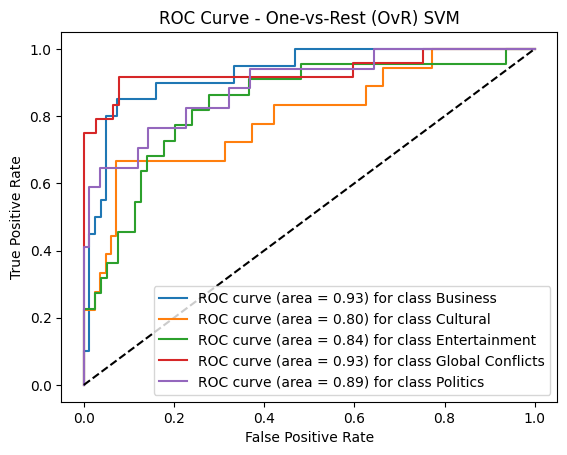

In [54]:
# Initialize SVC classifier
svm_classifier = SVC(kernel='linear', probability=True)

# One-vs-Rest (OvR) strategy for multiclass classification
ovr_classifier = OneVsRestClassifier(svm_classifier)

# Fit the classifier
ovr_classifier.fit(X_train_tfidf, y_train)

# Binarize the labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=ovr_classifier.classes_)

# Predict probabilities on test data
y_score = ovr_classifier.predict_proba(X_test_tfidf)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(ovr_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(ovr_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {ovr_classifier.classes_[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - One-vs-Rest (OvR) SVM')
plt.legend(loc="lower right")
plt.show()


### Confusion Matrix - One-vs-Rest (OvR) SVM

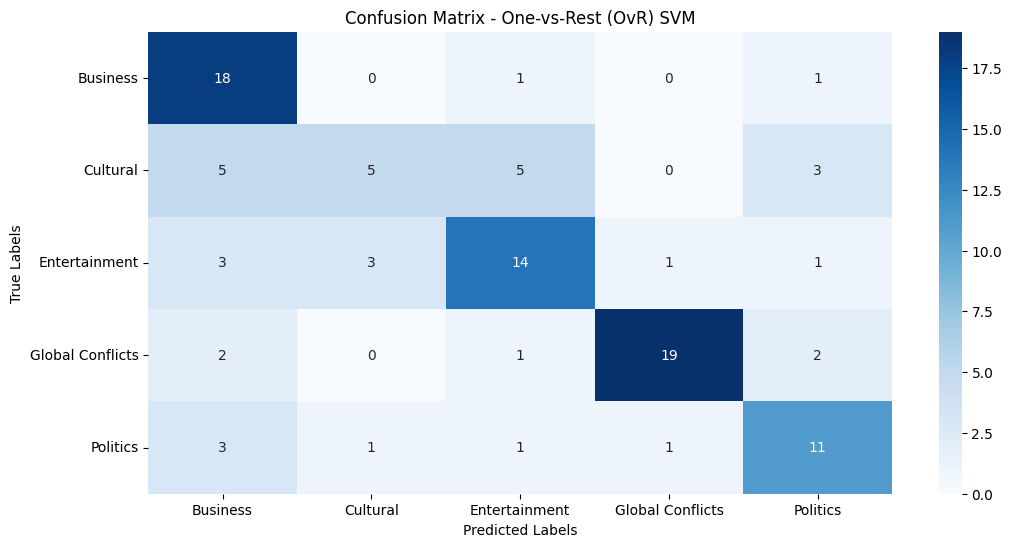

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=ovr_classifier.classes_, yticklabels=ovr_classifier.classes_)
plt.title('Confusion Matrix - One-vs-Rest (OvR) SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Save & Load the Model

In [55]:
# Save the trained model to a file
with open('ovr_svm_classifier.pkl', 'wb') as file:
    pickle.dump(ovr_classifier, file)
    print('pickle file saved')

pickle file saved


In [56]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

## Predict With Latest News

In [57]:
# Sample text for prediction
text_to_predict = "Meet the sculptor whose Ram Lalla idol made the cut in Ayodhya"

# Vectorize the sample text using the same TF-IDF vectorizer used for training
text_vectorized = tfidf_vectorizer.transform([text_to_predict])

# Load the saved model from the file
with open('ovr_svm_classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to predict the topic for the given text
predicted_topic = loaded_model.predict(text_vectorized)

print(f"Predicted topic for the text: {predicted_topic[0]}")


Predicted topic for the text: Cultural


### Word Cloud - News by Clusters

In [58]:
# Function to preprocess text within each category
def preprocess_text(data, text_column_name):
    grouped = data.groupby('topic')
    processed_texts = {}

    for category, group_data in grouped:
        # Concatenate all text within the category
        text = ' '.join(group_data[text_column_name])

        # Tokenize the text and count word frequencies
        words = text.split()
        word_freq = Counter(words)

        # Store processed text for each category
        processed_texts[category] = word_freq

    return processed_texts

In [59]:
# Function to generate word clouds
def generate_word_clouds(processed_texts):
    for category, word_freq in processed_texts.items():
        # Generate word cloud from word frequencies
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Sections: {category}', fontweight='bold')
        plt.axis('off')  # Turn off axis labels
        plt.show()

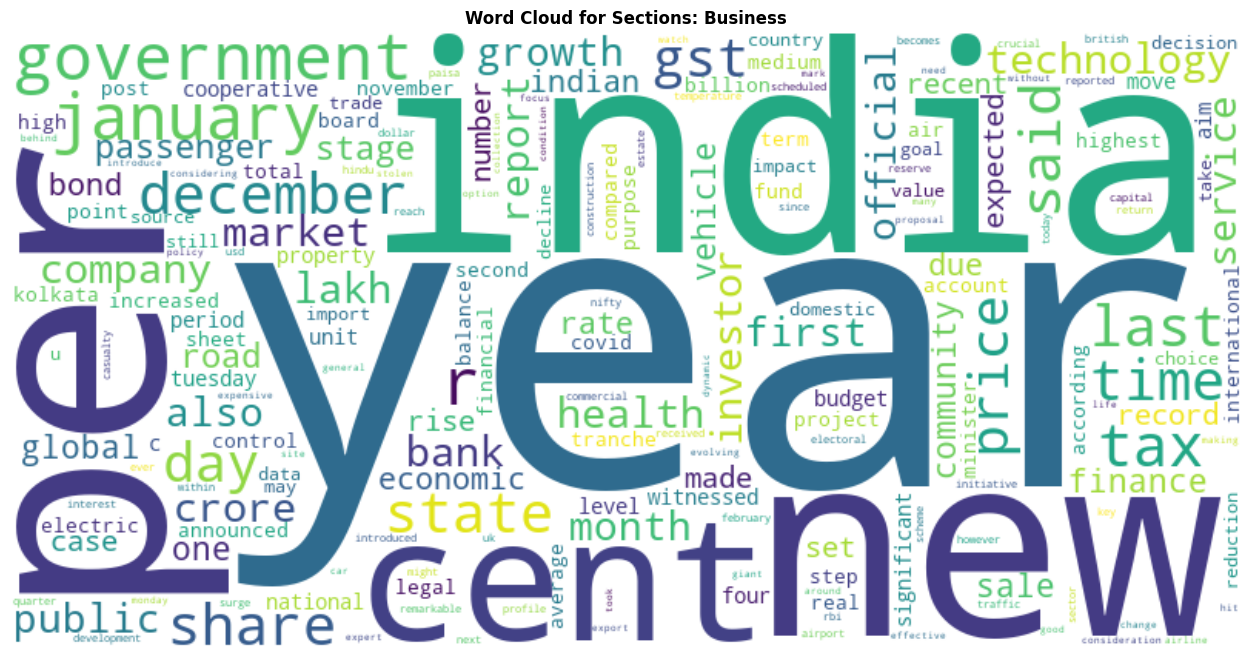

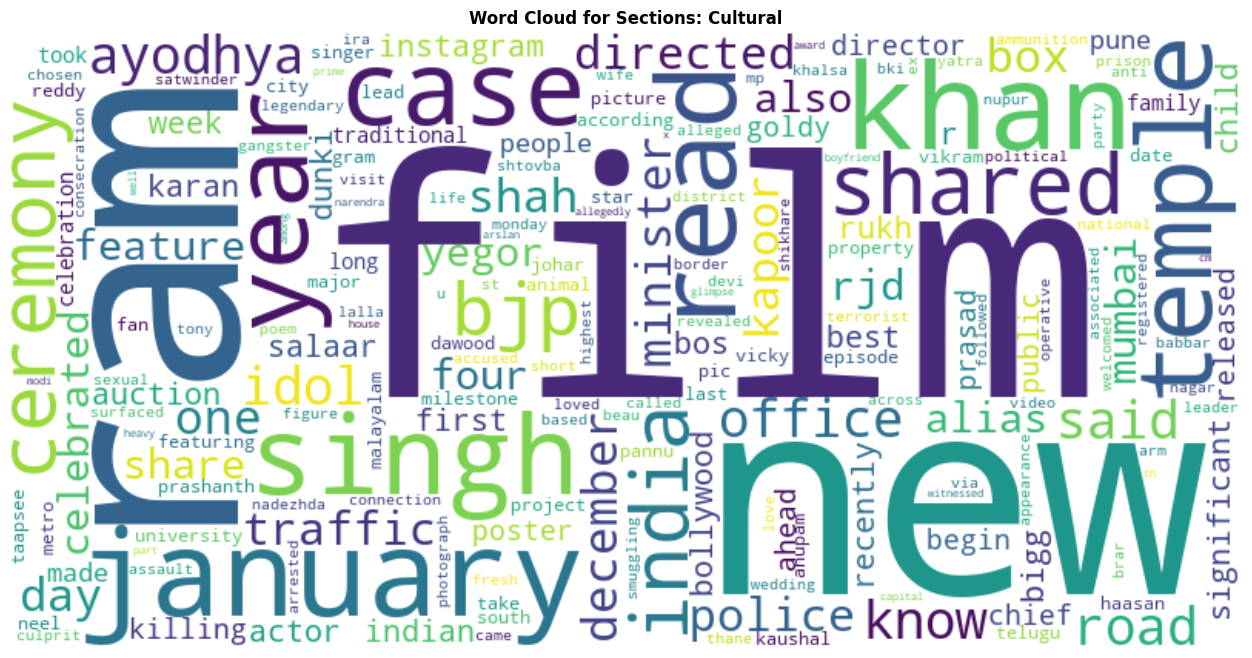

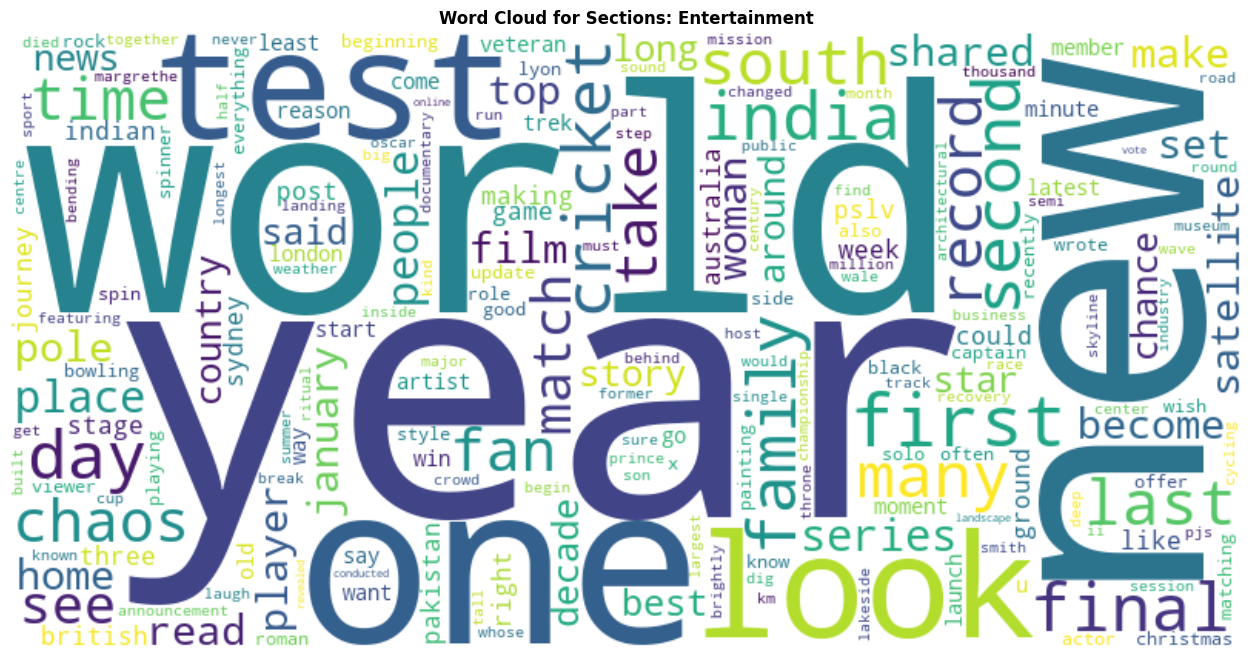

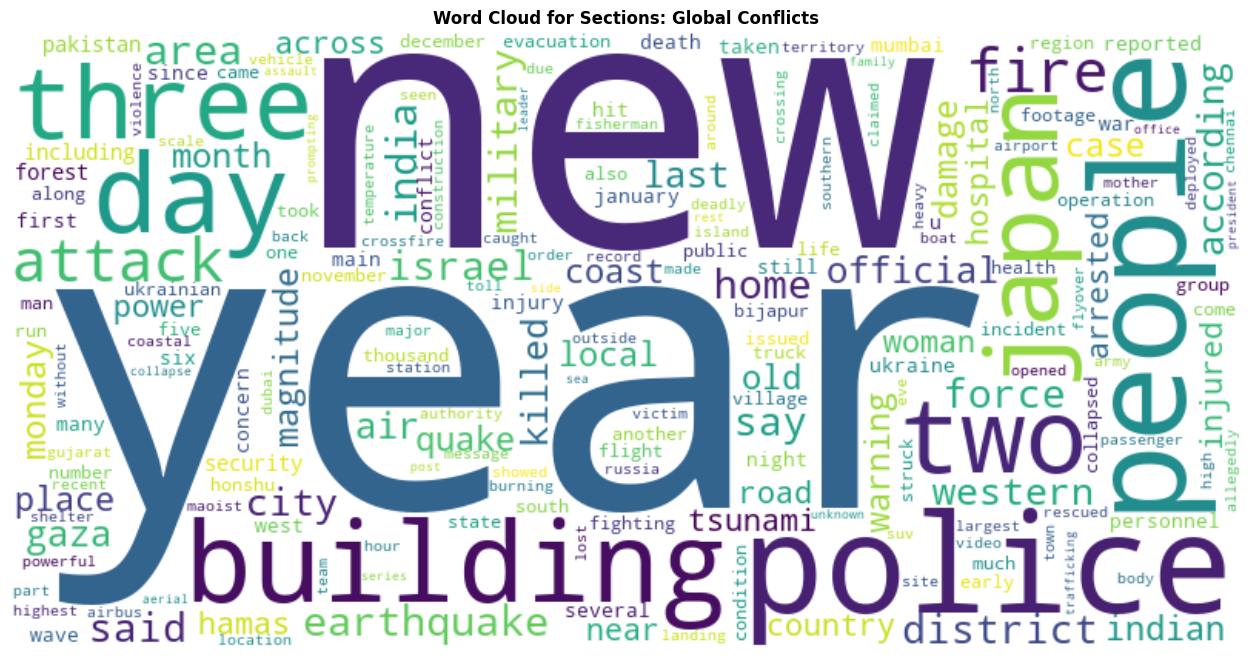

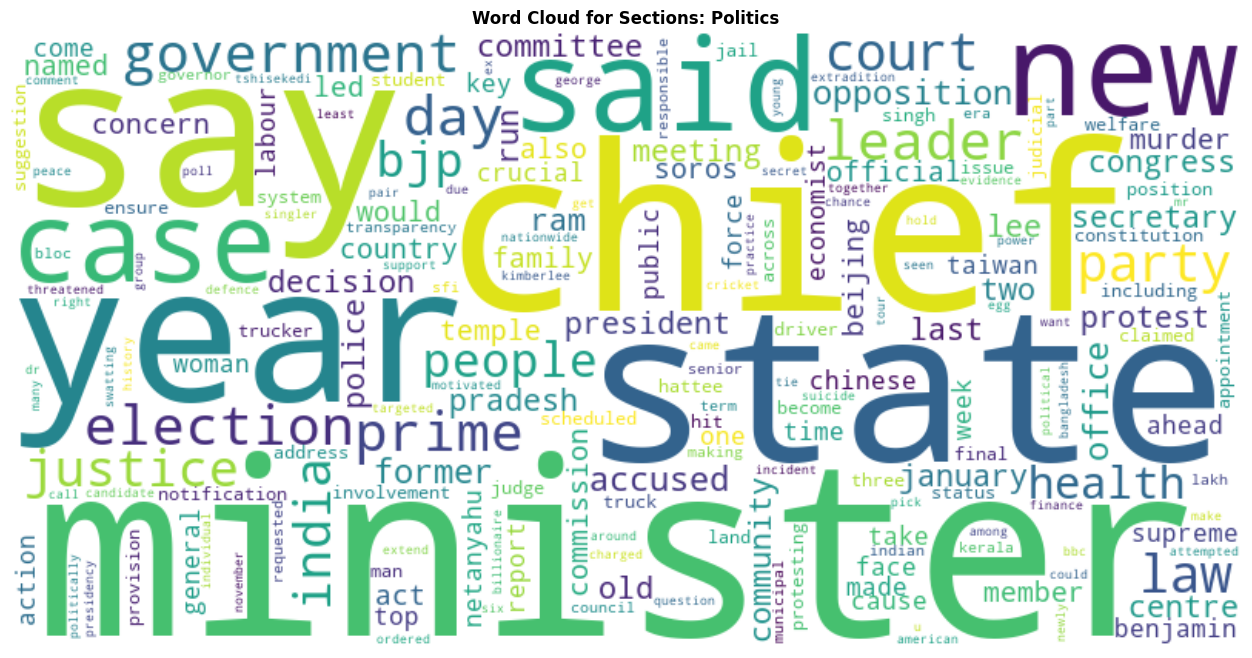

In [60]:
# Preprocess text within each category
processed_texts = preprocess_text(final_con, 'Content')
generate_word_clouds(processed_texts)